# Technologies
This section briefly describes the software and hardware used for the purposes
of design and evaluation of the experiments. All computations regarding regression experiments are run on a computer with: 
- an PC Intel(R) Core (TM) i5-8500 CPU @3.00GHz (6CPU), 16GB Ram
- an PC Intel(R) Core (TM) i5-8500 CPU @3.00GHz (6CPU), 8GB Ram
- GPU T4 (2GPU, 14.8GB Ram)

The code for evaluating the experiments is written in Python 3.10.11.\
Regarding SGPR, SVGP models, we use the implementations using a TensorFlow based library called GPflow. (gpflow=2.9.0)\
BBMM, KISS_GP, MSGP was implemented using GPYtorch (gpytorch=1.11), which is built upon the PyTorch framework.\
With Exact Gaussian processes for massive datasets via non‑stationary sparsity‑discovering kernels, we use fvGP (fvgp=4.0.11) and run in Dask Cluster. \
The last, FITC was implemented by pyGPs (pyGPs=1.3.5)

**Tập dữ liệu thử nghiệm gồm 3 tập:**
- 1 tập dataset 1D tự sinh theo hàm f(x)
- 2 tập dữ liệu được public

# I. Tập 20k dataset 1D tự sinh

Hàm f(x): $f(x) = sin(5x) + cos(10x) + 2(x-0.4)^2cos(100x)$ \
**Dữ liệu gồm 20k điểm sinh ra từ giá trị [0-1] cách đều nhau, giá trị y biểu diễn bởi hàm f(x)**\
y = f(x) + [randomValue]\
với *randomValue = (random theo phân phối chuẩn trong khoảng [0-1) - 0.5)*0.5*\
![Hàm biểu diễn dữ liệu](results/20k_FvGP_Dask_data.png "Hàm biểu diễn dữ liệu") \



# 1. Đánh giá RMSE, Time training tập dữ liệu 20K tự sinh với inducing point m=20

In [1]:
import pandas as pd
from IPython.display import Image

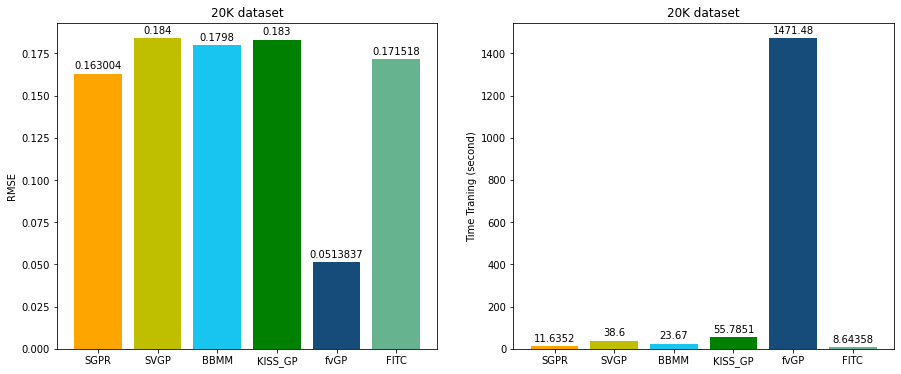

In [9]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15, 6))

algs = ['SGPR', 'SVGP', 'BBMM', 'KISS_GP',  'fvGP',  'FITC']

colors = ['orange', 'y',  '#18c5f0', 'g', '#154c79', '#66b38f']
# rmses = [0.163004062127106, 0.1846035981585675, 0.182958051562309, 0.183056607842445, 0.186435386538505, 0.05138373291404252, 0.182948172092437, 0.171517779055253]
rmses = [0.163004062127106, 0.184, 0.1798, 0.183,  0.05138373291404252, 0.171517779055253]

bar1 = ax1.bar(algs, rmses, color = colors)
ax1.set_ylabel('RMSE')
ax1.set_title('20K dataset')
ax1.bar_label(bar1, padding=3)

times = [11.6352236270904,38.6,23.67,55.7850821018218,1471.4755306243896,8.64358067512512,]

bar2 = ax2.bar(algs, times, color = colors)
ax2.set_ylabel('Time Traning (second)')
ax2.set_title('20K dataset')
ax2.bar_label(bar2, padding=3)

plt.show()

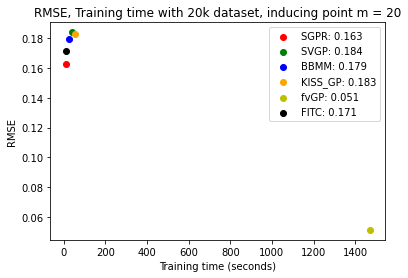

In [1]:
import matplotlib.pyplot as plt
algs = ['SGPR: 0.163', 'SVGP: 0.184', 'BBMM: 0.179', 'KISS_GP: 0.183',  'fvGP: 0.051',  'FITC: 0.171']
rmses = [0.163004062127106, 0.184, 0.1798, 0.183,  0.05138373291404252, 0.171517779055253]
times = [11.6352236270904,38.6,23.67,55.7850821018218,1471.4755306243896,8.64358067512512]
colors = ['red', 'g', 'b', 'orange', 'y', 'black']
fig, ax = plt.subplots()
for i in range(len(algs)):
    ax.scatter(times[i], rmses[i], color = colors[i], label = algs[i])
ax.legend(loc = 'upper right')
ax.set_xlabel('Training time (seconds)')
ax.set_ylabel('RMSE')
plt.title('RMSE, Training time with 20k dataset, inducing point m = 20')
plt.savefig('rmse_time_20k_m20.png')
plt.show()

# 2. Đánh giá kết quả và thời gian chạy khi thử nghiệm SGPR, SVGP, FITC tập dữ liệu 20K tự sinh thay đổi các giá trị m (inducing point)

## RMSE

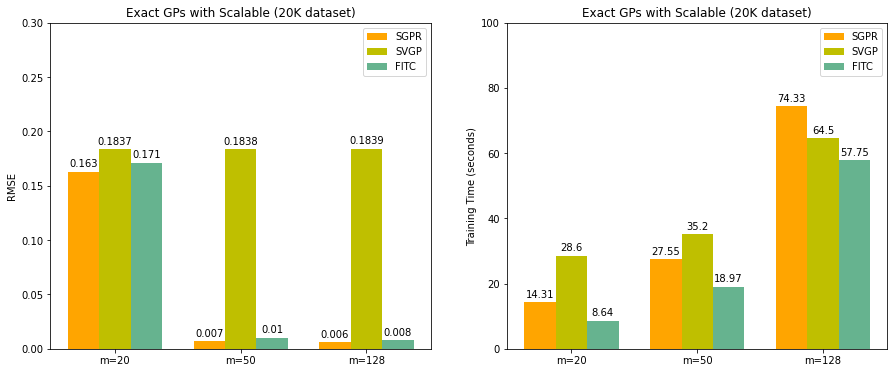

In [62]:
import matplotlib.pyplot as plt
import numpy as np

species = ("m=20", "m=50", "m=128")

# Làm tròn kết quả
rmses = {
    'SGPR': (0.163, 0.007, 0.006),
    'SVGP': (0.1837, 0.1838, 0.1839),
    'FITC': (0.171, 0.010, 0.008)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15, 6))
colors = ['orange', 'y',  '#66b38f']
for attribute, measurement in rmses.items():
    offset = width * multiplier
    rects = ax1.bar(x + offset, measurement, width, label=attribute, color = colors[multiplier])
    ax1.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('RMSE')
ax1.set_title('Exact GPs with Scalable (20K dataset)')
ax1.set_xticks(x + width, species)
ax1.legend(loc='upper right')
ax1.set_ylim(0, 0.3)


training_times = {
    'SGPR': (14.31, 27.55, 74.33),
    'SVGP': (28.6, 35.2, 64.5),
    'FITC': (8.64, 18.97, 57.75)
}

multiplier=0

for attribute, measurement in training_times.items():
    offset = width * multiplier
    rects = ax2.bar(x + offset, measurement, width, label=attribute, color = colors[multiplier])
    ax2.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Training Time (seconds)')
ax2.set_title('Exact GPs with Scalable (20K dataset)')
ax2.set_xticks(x + width, species)
ax2.legend(loc='upper right')
ax2.set_ylim(0, 100)

plt.show()

# 3. Đánh giá kết quả và thời gian chạy khi thử nghiệm SGPR, SVGP, FITC tập dữ liệu 1M tự sinh với m=20

Đánh giá kết quả và thời gian chạy khi thử nghiệm SGPR, SVGP, KISS-GP, FITC tập dữ liệu 1M tự sinh với m=20


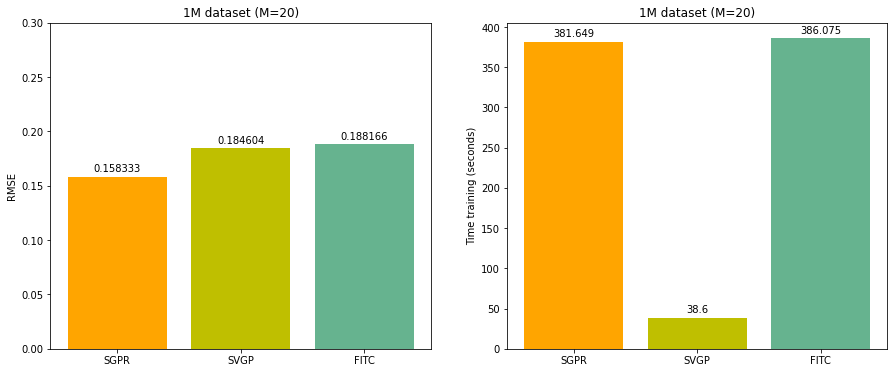

In [61]:
import matplotlib
print('Đánh giá kết quả và thời gian chạy khi thử nghiệm SGPR, SVGP, KISS-GP, FITC tập dữ liệu 1M tự sinh với m=20')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15, 6))

cmap = matplotlib.cm.get_cmap('Spectral')

alg = ['SGPR', 'SVGP', 'FITC']
rmses = [0.158333497273067,0.1846035981585675,0.188165873427247]

bar1 = ax1.bar(alg, rmses, color = ['orange', 'y', '#66b38f'], label = rmses)

ax1.set_ylabel('RMSE')
ax1.set_title('1M dataset (M=20)')
ax1.set_ylim(0, 0.3)
ax1.bar_label(bar1, padding=3)

times = [381.648607015609, 38.6, 386.075281858444]
bar2 = ax2.bar(alg, times, color = ['orange', 'y', '#66b38f'] )
ax2.set_ylabel('Time training (seconds)')
ax2.set_title('1M dataset (M=20)')
ax2.bar_label(bar2, padding=3)

plt.show()


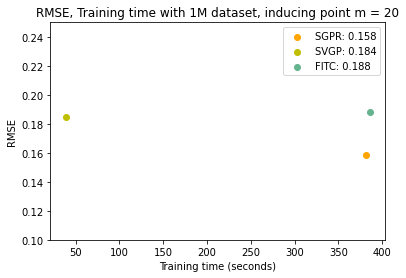

In [2]:
import matplotlib.pyplot as plt
algs = ['SGPR: 0.158', 'SVGP: 0.184', 'FITC: 0.188']
rmses = [0.158333497273067, 0.1846035981585675, 0.188165873427247]
times = [381.648607015609, 38.6, 386.075281858444]
colors = ['orange', 'y', '#66b38f']
fig, ax = plt.subplots()
for i in range(len(algs)):
    ax.scatter(times[i], rmses[i], color = colors[i], label = algs[i])
ax.legend(loc = 'upper right')
ax.set_xlabel('Training time (seconds)')
ax.set_ylabel('RMSE')
ax.set_ylim(0.1, 0.25)
plt.title('RMSE, Training time with 1M dataset, inducing point m = 20')
plt.savefig('rmse_time_1M_m20.png')
plt.show()

## Đánh giá kết quả và thời gian chạy khi thử nghiệm SGPR, SVGP, FITC tập dữ liệu 1M tự sinh với m=128

Đánh giá kết quả và thời gian chạy khi thử nghiệm SGPR, SVGP, KISS-GP, FITC tập dữ liệu 1M tự sinh với m=128


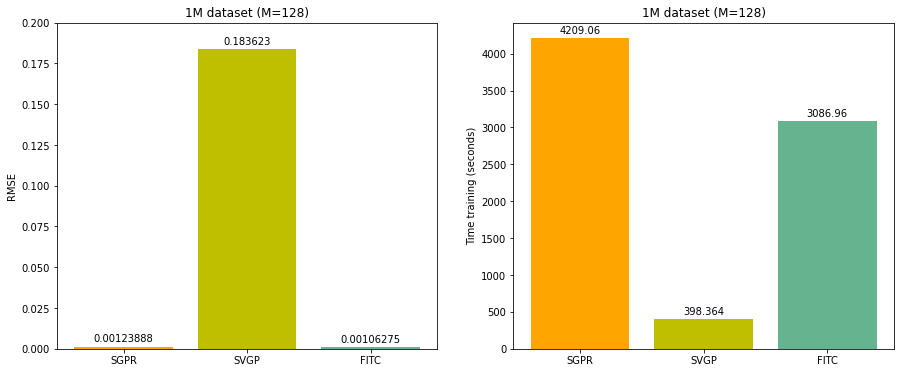

In [60]:
import matplotlib
print('Đánh giá kết quả và thời gian chạy khi thử nghiệm SGPR, SVGP, KISS-GP, FITC tập dữ liệu 1M tự sinh với m=128')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15, 6))


alg = ['SGPR', 'SVGP', 'FITC']
rmses = [0.0012388815850964741, 0.1836225589794686,0.0010627525535484067]

bar1 = ax1.bar(alg, rmses, color = ['orange', 'y', '#66b38f'], label = rmses)

ax1.set_ylabel('RMSE')
ax1.set_title('1M dataset (M=128)')
ax1.set_ylim(0, 0.2)
ax1.bar_label(bar1, padding=3)

times = [4209.060021877289, 398.3644962310791, 3086.9568042755127]
bar2 = ax2.bar(alg, times, color = ['orange', 'y', '#66b38f'] )
ax2.set_ylabel('Time training (seconds)')
ax2.set_title('1M dataset (M=128)')
ax2.bar_label(bar2, padding=3)

plt.show()

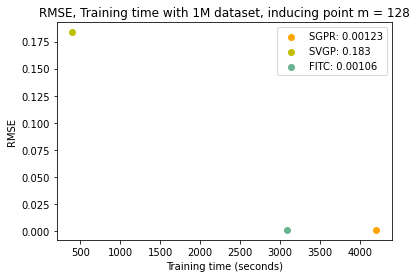

In [3]:
import matplotlib.pyplot as plt
algs = ['SGPR: 0.00123', 'SVGP: 0.183', 'FITC: 0.00106']
rmses = [0.0012388815850964741, 0.1836225589794686,0.0010627525535484067]
times = [4209.060021877289, 398.3644962310791, 3086.9568042755127]
colors = ['orange', 'y', '#66b38f']
fig, ax = plt.subplots()
for i in range(len(algs)):
    ax.scatter(times[i], rmses[i], color = colors[i], label = algs[i])
ax.legend(loc = 'upper right')
ax.set_xlabel('Training time (seconds)')
ax.set_ylabel('RMSE')
# ax.set_ylim(-0.1, 0.25)
plt.title('RMSE, Training time with 1M dataset, inducing point m = 128')
plt.savefig('rmse_time_1M_m128.png')
plt.show()

# 4. Biểu diễn kết quả

## 4.1. Biểu diễn kết quả mô hình sử dụng phương pháp của NoAck, chạy trên Dask

![Kết quả biểu diễn phương pháp của NoAck](results/20k_FvGP_Dask_result.png "Kết quả biểu diễn phương pháp của NoAck")

Biểu diễn kết quả:
- Đường màu cam: biểu diễn hàm f(x)
- Đường màu xanh: biểu diễn dữ liệu dự đoán
- Màu đen: Hiển thị các điểm (x,y) trên tọa độ (do có + noise nên các điểm đen (x,y) sẽ ở xung quanh so với đường màu cam 
- RMSE: **0.05138373291404252**
- Time training: **1471.4755306243896**
- Kernel sử dụng: **wendland_anisotropic_gp2Scale_cpu**
- Point Number: **20.000**
- batch_size: **5000**
- Num_batches: **4**

Đánh giá RMSE và Training time theo giá trị max iteration khi chạy fvGP (NoAck)
- NUM_TRAIN:20000
- BATCH_SIZE:50000


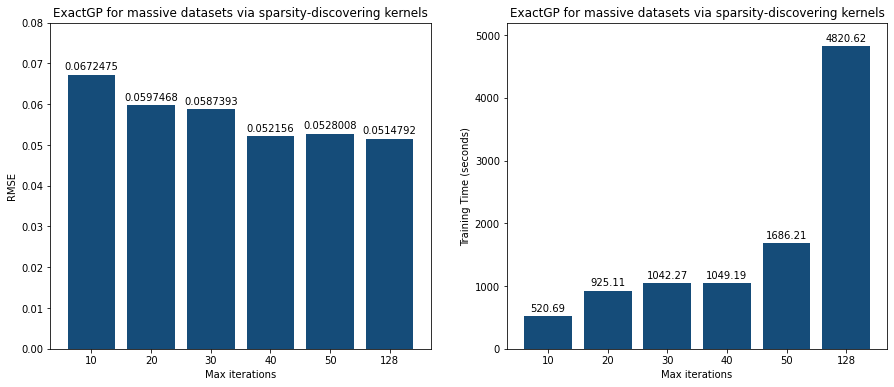

In [49]:
import matplotlib.pyplot as plt
print('Đánh giá RMSE và Training time theo giá trị max iteration khi chạy fvGP (NoAck)')
print(f'- NUM_TRAIN:20000')
print(f'- BATCH_SIZE:50000')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15, 6))

import matplotlib.pyplot as plt
data = {'10': 0.06724748495417274, '20': 0.059746842056406874, '30': 0.0587392863487498, '40': 0.052155960497799754, '50': 0.05280079185116775, '128': 0.05147917996756522}
data_time = {'10': 520.69, '20': 925.11, '30': 1042.27, '40': 1049.19, '50': 1686.21, '128': 4820.62}
names = list(data.keys())
values = list(data.values())
bar = ax1.bar(names, values, color = '#154c79')
ax1.set_title('ExactGP for massive datasets via sparsity‑discovering kernels')
ax1.set_xlabel('Max iterations')
ax1.set_ylabel('RMSE')
ax1.set_ylim(0, 0.08)
ax1.bar_label(bar, padding=3)

bar2 = ax2.bar(names, list(data_time.values()), color = '#154c79')
ax2.set_title('ExactGP for massive datasets via sparsity‑discovering kernels')
ax2.set_xlabel('Max iterations')
ax2.set_ylabel('Training Time (seconds)')
ax2.set_ylim(0, 5200)
ax2.bar_label(bar2, padding=3)

plt.show()


Đánh giá RMSE và Training time theo giá trị batch size khi chạy fvGP (NoAck)
- NUM_TRAIN:20000
- MAX_INTER:50


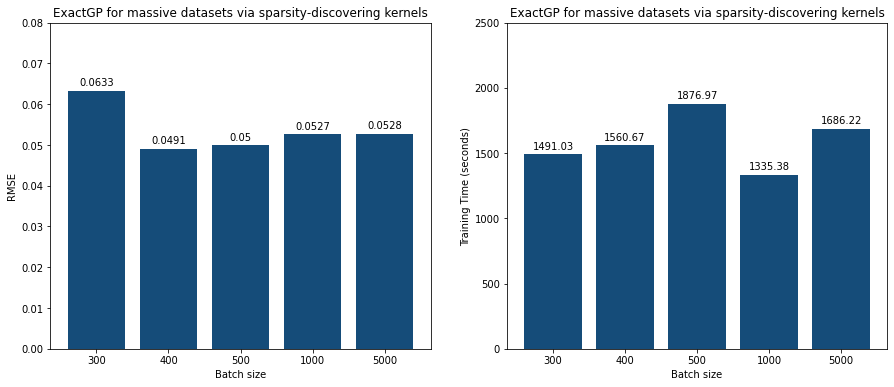

In [53]:
import matplotlib.pyplot as plt
print('Đánh giá RMSE và Training time theo giá trị batch size khi chạy fvGP (NoAck)')
print(f'- NUM_TRAIN:20000')
print(f'- MAX_INTER:50')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15, 6))

import matplotlib.pyplot as plt
data = {'300': 0.0633, '400': .0491, '500': 0.0500, '1000': 0.0527, '5000': 0.0528}
data_time = {'300': 1491.029, '400': 1560.672, '500': 1876.970, '1000': 1335.375, '5000': 1686.219}
names = list(data.keys())
values = list(data.values())
bar = ax1.bar(names, values, color = '#154c79')
ax1.set_title('ExactGP for massive datasets via sparsity‑discovering kernels')
ax1.set_xlabel('Batch size')
ax1.set_ylabel('RMSE')
ax1.set_ylim(0, 0.08)
ax1.bar_label(bar, padding=3)

bar2 = ax2.bar(names, list(data_time.values()), color = '#154c79')
ax2.set_title('ExactGP for massive datasets via sparsity‑discovering kernels')
ax2.set_xlabel('Batch size')
ax2.set_ylabel('Training Time (seconds)')
ax2.set_ylim(0, 2500)
ax2.bar_label(bar2, padding=3)

plt.show()

## 4.2 Áp dụng SGPR sử dụng thư viện gpflow
![Kết quả sử dụng SGPR tập dữ liệu 20k](results/SGPR_result.png "Kết quả sử dụng SGPR tập dữ liệu 20k")

RMSE: **0.163004062** \
Time Training: **11.63522363**

## Đánh giá RMSE, Training time với các giá trị m (inducing point) khác nhau

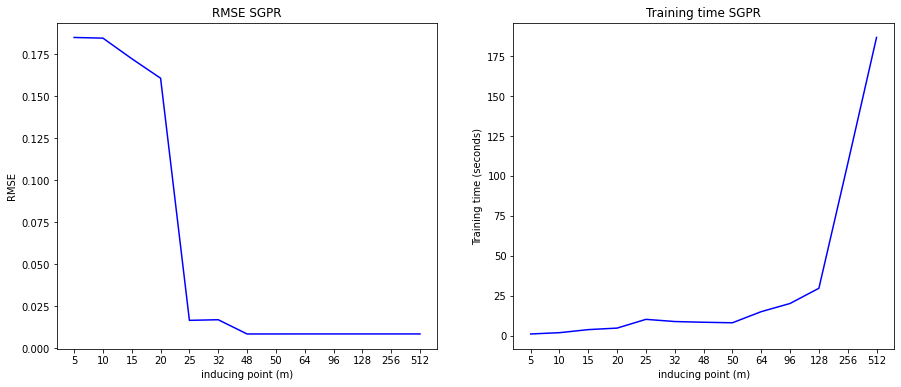

In [1]:
m_arr_x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
m_arr=[5, 10, 15, 20, 25, 32, 48, 50, 64, 96, 128, 256, 512]
time_arr=[1.1148176193237305, 1.9268651008605957, 3.837125301361084, 4.7922797203063965, 10.26363229751587, 8.901738405227661, 8.445625305175781, 8.124195575714111, 15.07686185836792, 20.200151920318604, 29.708193063735962, 107.5630042552948, 186.62545037269592]
rmse_arr=[0.18514783308030355, 0.18474775738212323, 0.1724859382994944, 0.1608415938098119, 0.016461098939888476, 0.01683028173258196, 0.008336218902844642, 0.008345946511255866, 0.008365323159138092, 0.008365339966314243, 0.008365230999485404, 0.00836503666197196, 0.008364888162704004]

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15, 6))
ax1.plot(m_arr_x, rmse_arr, 'b')
ax1.set_xticks(m_arr_x, m_arr)
ax1.set_xlabel('inducing point (m)')
ax1.set_ylabel('RMSE')
ax1.set_title("RMSE SGPR")

ax2.plot(m_arr_x, time_arr, 'b')
ax2.set_xticks(m_arr_x, m_arr)
ax2.set_xlabel('inducing point (m)')
ax2.set_ylabel('Training time (seconds)')
ax2.set_title("Training time SGPR")

plt.show()

# 4.3 Áp dụng SVGP sử dụng thư viện gpflow

![Kết quả SVGP 20k data](results/SVGP_result.png "Kết quả SVGP 20k data")
RMSE: **0.184941900594768** \
Time Training: **421.685602426528**

# 4.4 Áp dụng BBMM sử dụng thư viện gpflow

![Kết quả BBMM 20k data](results/BBMM_result.png "Kết quả BBMM 20k data")
RMSE: **0.17983272671699524** \
Time Training: **23.67540740966797**

# 4.5 Áp dụng KISS_GP sử dụng thư viện GPytorch

![Kết quả KISS_GP 20k data](results/KISS_GP_result.png "Kết quả KISS_GP 20k data")
RMSE: **0.183056607842445** \
Time Training: **55.7850821018218**

# 5. Thực thi với dữ liệu  Climate

- Bộ dữ liệu do NoAck cung cấp gồm dữ liệu trạm: **station_coord.npy** và dữ liệu nhiệt độ đo được ở từng trạm: **data.npy**. Bộ dữ liệu khoảng 51 triệu dữ liệu gồm các giá trị: **latitude (vĩ độ), longitude (kinh độ), temperature (độ C)**

- **Dữ liệu nhiệt độ phân bố theo trạm:** Lấy random 4000 dữ liệu trong 51 triệu để biểu diễn trên biểu đồ theo latitude, longitude và nhiệt độ (độ C) như hình bên dưới:\
![Climate Data](results/Climate_Data.png "Dữ liệu climate")

**Biểu đồ phân bố giá trị kinh độ:** \
![phân bố dữ liệu kinh độ](results/longitude.png "Phân bố dữ liệu kinh độ")

**Biểu đồ phân bố giá trị vĩ độ:** \
![phân bố dữ liệu vĩ độ](results/latitude.png "Phân bố dữ liệu vĩ độ")

**Biểu đồ phân bố giá trị nhiệt độ:** \
![phân bố dữ liệu nhiệt độ](results/temperature.png "Phân bố dữ liệu nhiệt độ")

Do bị giới hạn về tài nguyên nên chỉ thử nghiệm được với tập dữ liệu 100K dataset.
- Dữ liệu trainining: **20662 dữ liệu (chiếm 0.4%)**
- Dữ liệu testing:    **10332 dữ liệu (chiếm 0.2%)**
- Dữ liệu input/output được chuẩn hóa theo MinMaxScaler đưa về dải giá trị [0-1]

**Cấu hình máy sử dụng để training:** 
- 1 PC: Intel Core i5-8500 @3.00GHz (6CPUs), 16GB Ram
- 1 PC: Intel Core i5-8500 @3.00GHz (6CPUs), 8GB Ram

Kết quả chạy dữ liệu Climate:


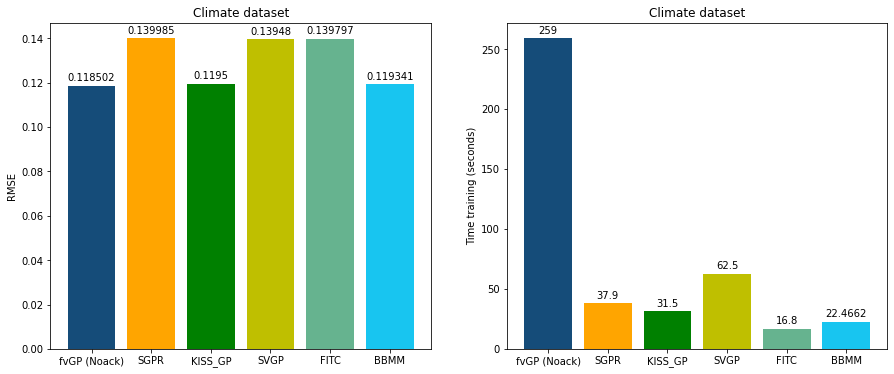

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15, 6))

cmap = matplotlib.cm.get_cmap('Spectral')

alg = ['fvGP (Noack)', 'SGPR', 'KISS_GP', 'SVGP', 'FITC', 'BBMM']
rmses = [0.11850195935942713,0.13998547855136825,0.1195, 0.13947993016756674, 0.1397971827085861, 0.11934143304824829]

bar1 = ax1.bar(alg, rmses, color = ['#154c79', 'orange', 'g', 'y', '#66b38f', '#18c5f0'])
ax1.set_ylabel('RMSE')
ax1.set_title('Climate dataset')
ax1.bar_label(bar1, padding=3)

times = [259, 37.9, 31.5, 62.5, 16.8, 22.466159105300903]
bar2 = ax2.bar(alg, times, color = ['#154c79', 'orange', 'g', 'y','#66b38f', '#18c5f0'] )
ax2.set_ylabel('Time training (seconds)')
ax2.set_title('Climate dataset')
ax2.bar_label(bar2, padding=3)
print('Kết quả chạy dữ liệu Climate:')
plt.show()

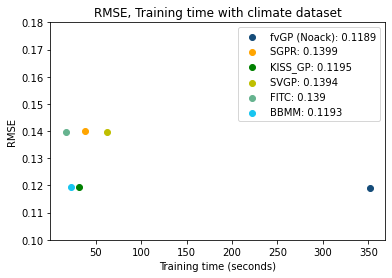

In [5]:
import matplotlib.pyplot as plt
algs = ['fvGP (Noack): 0.1189', 'SGPR: 0.1399', 'KISS_GP: 0.1195', 'SVGP: 0.1394', 'FITC: 0.139', 'BBMM: 0.1193']
rmses = [0.11896907722643742,0.13998547855136825,0.1195, 0.13947993016756674, 0.1397971827085861, 0.11934143304824829]
times = [352, 37.9, 31.5, 62.5, 16.8, 22.466159105300903]
colors = ['#154c79', 'orange', 'g', 'y', '#66b38f', '#18c5f0']
fig, ax = plt.subplots()
for i in range(len(algs)):
    ax.scatter(times[i], rmses[i], color = colors[i], label = algs[i])
ax.legend(loc = 'upper right')
ax.set_xlabel('Training time (seconds)')
ax.set_ylabel('RMSE')
ax.set_ylim(0.1, 0.18)
plt.title('RMSE, Training time with climate dataset')
plt.savefig('rmse_time_climate.png')
plt.show()

| Phương pháp | Tham số | RMSE | Thời gian training  |
|:---         |:---       |:---                |:---|
|fvGP (Noack) |n=20k      |0.1290226202626308  |35.69128727912903|
|SGPR (GPFlow)|n=20k,m=32 |0.13998307166627288 |19.5 s|
|SGPR (GPFlow)|n=20k,m=64 |0.13998498287588734 |26.3 s|
|SGPR (GPFlow)|n=20k,m=128|0.13998547855136825 |37.9 s|
|SVGP (GPFlow)|n=20k,m=32 |0.13947993016756674 |47.4 s|
|SVGP (GPFlow)|n=20k,m=64 |0.13996557246171398 |1min 20s|
|KISS-GP      |n=20k      |0.1195              |31.5|
|FITC         |n=20k      |0.1397971827085861  |16.8|
|BBMM         |n=20k      |0.11934143304824829 |22.466159105300903

# 6. Thử nghiệm với bộ dữ liệu 3D Road

Dataset: https://archive.ics.uci.edu/dataset/246/3d+road+network+north+jutland+denmark \
Bộ dữ liệu có 434.874 bản ghi gồm các trường:
1. OSM_ID: OpenStreetMap ID for each road segment or edge in the graph.
2. LONGITUDE: Web Mercaptor (Google format) longitude 
3. LATITUDE: Web Mercaptor (Google format) latitude
4. ALTITUDE: Height in meters. 
![Mô tả dữ liệu 3D Road](results/3d_road_desc.png "Mô tả dữ liệu 3D Road")

**Biểu đồ phân bố các feature và output của tập dữ liệu 3D Road:**\
![Biểu đồ phân bố các trường dữ liệu 3D Road](results/3d_road_pre_norm.png "Biểu đồ phân bố các trường dữ liệu 3D Road")

Tiền xử lý dữ liệu:
- Xóa bỏ trường OSM_ID
- Sử dụng trường ALTITUDE làm nhãn, sử dụng 2 trường LONGITUDE, LATITUDE là feature đầu vào cho mô hình
- Chuẩn hóa dữ liệu input/output sử dụng MinMaxScaler đưa giá trị của các cột về khoảng giá trị [0-1]
![Mô tả dữ liệu 3D Road sau khi chuẩn hóa các trường](results/3d_road_pos_norm_desc.png "Mô tả dữ liệu")

**Phân bố dữ liệu sau khi chuẩn hóa:**
![Phân bố dữ liệu sau khi chuẩn hóa](results/3d_road_pos_norm.png "Phân bố dữ liệu")

**Tập dữ liệu sử dụng để huấn luyện và đánh giá:**
- Tập training: 20.000 bản ghi lựa chọn random từ bộ dữ liệu
- Tập test: 10.000 bản ghi lựa chọn random từ bộ dữ liệu và không thuộc tập Training

### Thử nghiệm SVGP
Sử dụng 20.000 bản ghi training, 10.000 bản ghi đánh giá. thử nghiệm các gái trị Inducing point **m=16,20,32,64,128,512**

**Với m=128:**
- Metric ELBO (Evidence lower bound): Maximising the ELBO để tối ưu hóa mô hình
- Sử dụng Minibatch training với minibatch_size = 100, learning_rate = 0.1
![Biểu đồ histogram biểu diễn ELBO với minibatch training](results/SVGP_m128_elbo_his.png "Biểu đồ histogram biểu diễn ELBO với minibatch training")

![Biểu đồ biểu diễn time taken và elbo estimator ](results/SVGP_m128_elbo_time_taken_elbo_estimates.png "Biểu đồ biểu diễn time taken và elbo estimator")

**Biểu diễn giá trị ELBO theo iteration:**
![ELBO theo iteration](results/SVGP_m128_elbo_iteration.png "ELBO theo iteration")

### Thử nghiệm SGPR
Sử dụng 20004 bản ghi training, 10003 bản ghi đánh giá. thử nghiệm các gái trị Inducing point **m=16,20, 32,64,128,512**

Kết quả chạy dữ liệu 3D Road:


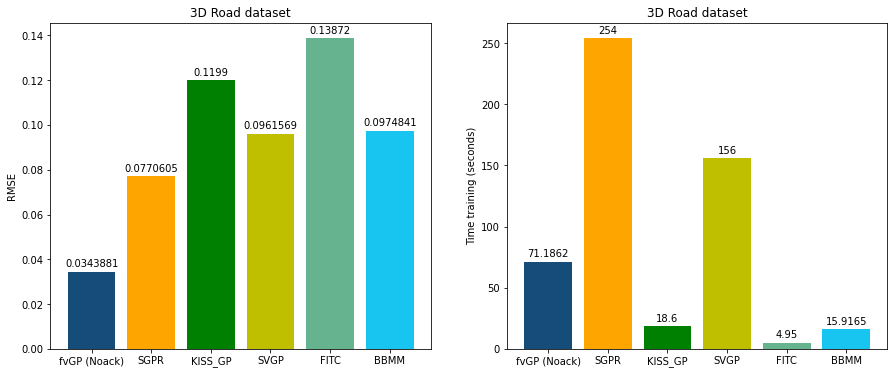

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15, 6))

cmap = matplotlib.cm.get_cmap('Spectral')

alg = ['fvGP (Noack)', 'SGPR', 'KISS_GP', 'SVGP', 'FITC', 'BBMM']
rmses = [0.03438807750797633,0.07706046284187251,0.1199, 0.09615689701957295, 0.13871966728933388, 0.09748406708240509]

bar1 = ax1.bar(alg, rmses, color = ['#154c79', 'orange', 'g', 'y', '#66b38f', '#18c5f0'])
ax1.set_ylabel('RMSE')
ax1.set_title('3D Road dataset')
ax1.bar_label(bar1, padding=3)

times = [71.18617653846741, 254, 18.6, 156, 4.95, 15.916516304016113]
bar2 = ax2.bar(alg, times, color = ['#154c79', 'orange', 'g', 'y','#66b38f', '#18c5f0'] )
ax2.set_ylabel('Time training (seconds)')
ax2.set_title('3D Road dataset')
ax2.bar_label(bar2, padding=3)
print('Kết quả chạy dữ liệu 3D Road:')
plt.show()

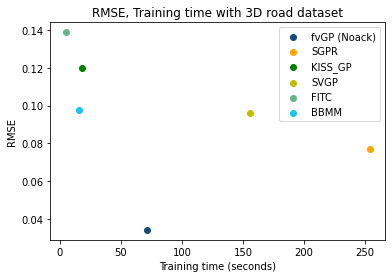

In [5]:
import matplotlib.pyplot as plt
algs = ['fvGP (Noack)', 'SGPR', 'KISS_GP', 'SVGP', 'FITC', 'BBMM']
rmses = [0.03438807750797633,0.07706046284187251,0.1199, 0.09615689701957295, 0.13871966728933388, 0.09748406708240509]
times = [71.18617653846741, 254, 18.6, 156, 4.95, 15.916516304016113]
colors = ['#154c79', 'orange', 'g', 'y', '#66b38f', '#18c5f0']
fig, ax = plt.subplots()
for i in range(len(algs)):
    ax.scatter(times[i], rmses[i], color = colors[i], label = algs[i])
ax.legend(loc = 'upper right')
ax.set_xlabel('Training time (seconds)')
ax.set_ylabel('RMSE')
# ax.set_ylim(-0.1, 0.25)
plt.title('RMSE, Training time with 3D road dataset')
plt.savefig('rmse_time_3d_road.png')
plt.show()

**Kết quả thử nghiệm SGPR, SVGP với tập 3D Road dataset**

|Phương pháp|giá trị M       |RMSE               |Thời gian training|
|:-------   |:--------       |:----              |---
|fvPG(NoAck)|n=20k           |0.03438807750797633|71.18617653846741 s
|SVGP       |n=20k, m=16     |0.11631197738714585|37.5 s
|SVGP       |n=20k, m=20     |0.10582067776375567|40.7 s
|SVGP       |n=20k, m=32     |0.09973169192291695|47.5 s
|SVGP       |n=20k, m=64     |0.09772114157048586|1min 12s
|SVGP       |n=20k, m=128    |0.09615689701957295|2min 36s
|SVGP       |n=20k, m=512    |0.09204600505197863|1h 2min 23s
|SGPR       |n=20k, m=16     |0.09038394466143221|47.6 s
|SGPR       |n=20k, m=32     |0.08357337786189972|1min 38s
|SGPR       |n=20k, m=64     |0.07706046284187251|4min 14s
|SGPR       |n=20k, m=128    |0.07293718493273328|14min 35s
|KISS_GP    |n=20k           |0.1199             |18.6
|FITC       |n=20k, m=2      |0.13066670262926378|0.6 s
|FITC       |n=20k, m=8      |0.13871966728933388|4.95 s
|FITC       |n=20k, m=20     |0.15323962889851173|10.9 s
|FITC       |n=20k, m=64     |0.16136692284828685|16 s
|FITC       |n=20k, m=128    |0.16398182746302797|46.434674978256226
|BBMM       |n=20k           |0.09748663753271103|15.380889177322388

# 7. Thử nghiệm với tập dữ liệu Bike

Dataset: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

![Bike dataset](results/bike_features.png "Bike dataset")

**Bộ dữ liệu có 17379 dòng với 17 trường, trong đó:**
- 13 trường features
- 1 trường ID
- 3 trường là nhãn (casual, registered, cnt)



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('bike_dataset/hour.csv')

def hist(df, col, title, xlabel, ylabel, ylim = None, xticks = None, showLabel = False):
    df_hour = df.groupby(col).hr.agg('count').to_frame('count').reset_index()
    name_h = df_hour[col].to_numpy()
    value_h = df_hour['count'].to_numpy()
    bar = plt.bar(name_h, value_h)
    if xticks:
        plt.xticks(name_h, xticks)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if ylim:
        plt.ylim(0, ylim)
    if showLabel:
        plt.bar_label(bar, padding=3)
    plt.show()

In [18]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


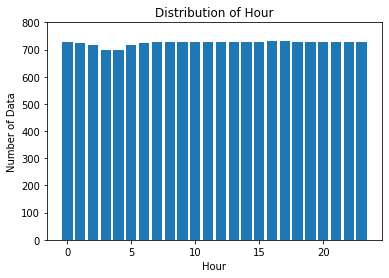

In [19]:
ylim = 800
hist(df,'hr','Distribution of Hour','Hour','Number of Data', ylim = ylim)

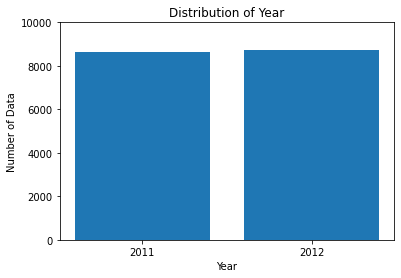

In [20]:
my_xticks = ['2011','2012']
ylim = 10000
hist(df,'yr','Distribution of Year','Year','Number of Data', xticks=my_xticks, ylim = ylim)

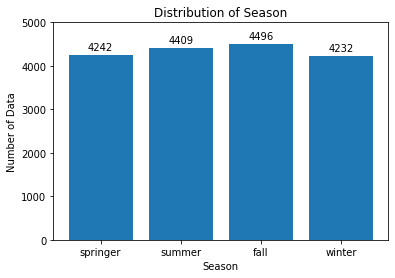

In [21]:
my_xticks = ['springer','summer','fall','winter']
ylim = 5000
hist(df,'season','Distribution of Season','Season','Number of Data', xticks=my_xticks, ylim = ylim, showLabel = True)

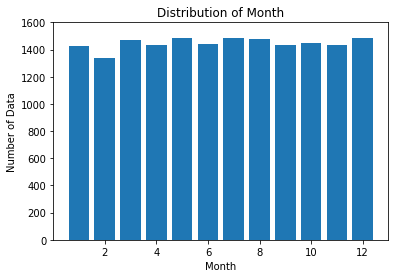

In [22]:
ylim = 1600
hist(df,'mnth','Distribution of Month','Month','Number of Data', ylim = ylim)

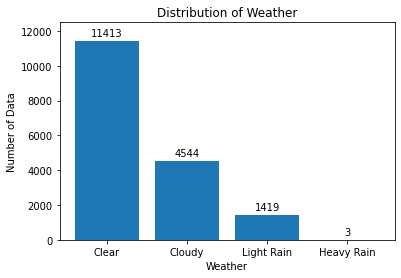

In [23]:
my_xticks = ['Clear','Cloudy','Light Rain','Heavy Rain']
ylim = 12500
hist(df,'weathersit','Distribution of Weather','Weather','Number of Data', xticks=my_xticks, ylim = ylim, showLabel = True)

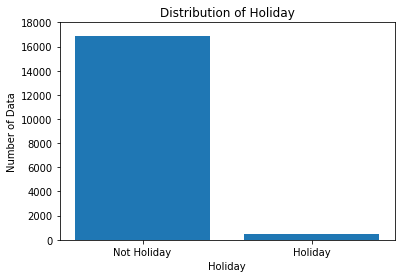

In [24]:
ylim = 18000
my_xticks = ['Not Holiday','Holiday']
hist(df,'holiday','Distribution of Holiday','Holiday','Number of Data', xticks=my_xticks, ylim = ylim)

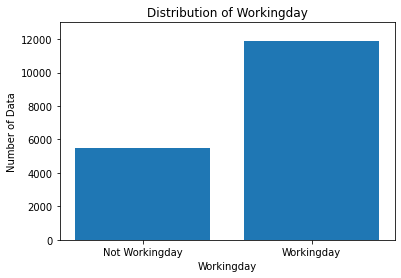

In [25]:
ylim = 13000
my_xticks = ['Not Workingday','Workingday']
hist(df,'workingday','Distribution of Workingday','Workingday','Number of Data', xticks=my_xticks, ylim = ylim)

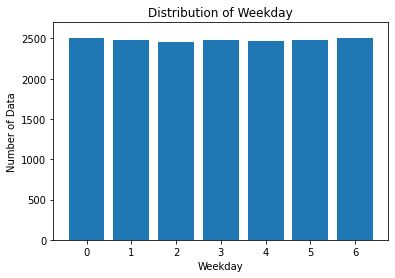

In [26]:
ylim = 2700
hist(df,'weekday','Distribution of Weekday','Weekday','Number of Data', ylim = ylim)

**Chuẩn hóa dữ liệu:**
- loại bỏ trường **instant** (trường **ID**)
- loại bỏ 2 trường nhãn không sử dụng (**casual, registered**)
- loại bỏ trường thời gian **dteday**
- chuẩn hóa các **trường yr, holiday, workingday** từ dạng int64 sang dạng float64
- chuẩn hóa **MinMaxScaler** với các trường float đưa về khoảng [0-1]: **season, mnth, hr, weekday, weathersit, cnt**

Sử dụng 12 trường làm feature training, trường cnt làm nhãn

**Chia tập train, test như sau:**
- Dữ liệu tập train: 11643 bản ghi (chiếm 67%)
- Dữ liệu tập test: 5736 bản ghi (chiếm 33%)


Kết quả chạy dữ liệu Bike Sharing:


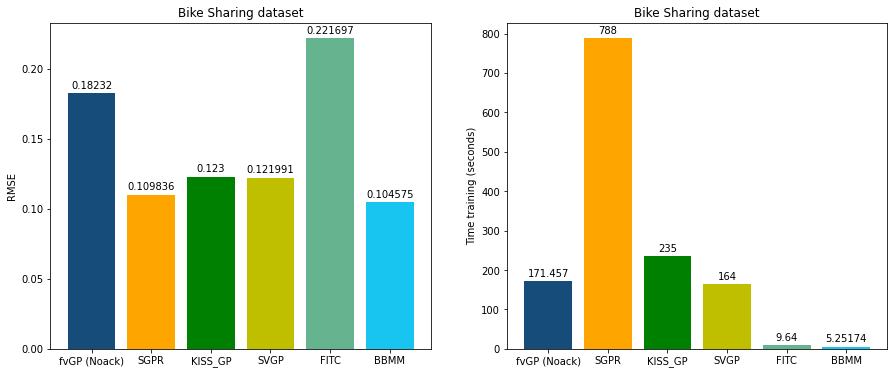

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15, 6))

cmap = matplotlib.cm.get_cmap('Spectral')

alg = ['fvGP (Noack)', 'SGPR', 'KISS_GP', 'SVGP', 'FITC', 'BBMM']
rmses = [0.1823198348608734,0.10983586559860285	,0.1230, 0.12199086477232163, 0.22169666201556829, 0.10457473993301392]

bar1 = ax1.bar(alg, rmses, color = ['#154c79', 'orange', 'g', 'y', '#66b38f', '#18c5f0'])
ax1.set_ylabel('RMSE')
ax1.set_title('Bike Sharing dataset')
ax1.bar_label(bar1, padding=3)

times = [171.45668601989746, 788, 235, 164, 9.64, 5.251741170883179]
bar2 = ax2.bar(alg, times, color = ['#154c79', 'orange', 'g', 'y','#66b38f', '#18c5f0'] )
ax2.set_ylabel('Time training (seconds)')
ax2.set_title('Bike Sharing dataset')
ax2.bar_label(bar2, padding=3)
print('Kết quả chạy dữ liệu Bike Sharing:')
plt.show()

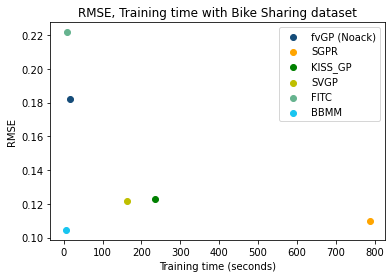

In [6]:
import matplotlib.pyplot as plt
algs = ['fvGP (Noack)', 'SGPR', 'KISS_GP', 'SVGP', 'FITC', 'BBMM']
rmses = [0.1823198348608734,0.10983586559860285	,0.1230, 0.12199086477232163, 0.22169666201556829, 0.10457473993301392]
times = [16.86, 788, 235, 164, 9.64, 5.251741170883179]
colors = ['#154c79', 'orange', 'g', 'y', '#66b38f', '#18c5f0']
fig, ax = plt.subplots()
for i in range(len(algs)):
    ax.scatter(times[i], rmses[i], color = colors[i], label = algs[i])
ax.legend(loc = 'upper right')
ax.set_xlabel('Training time (seconds)')
ax.set_ylabel('RMSE')
# ax.set_ylim(-0.1, 0.25)
plt.title('RMSE, Training time with Bike Sharing dataset')
plt.savefig('rmse_time_bike_sharing.png')
plt.show()

## Kết quả training với SGPR, SVGP

|Phương pháp|Tham số|   Kết quả          | Thời gian training|
|:---  |:---   |:---                |:---    |
|SGPR  |m=16   |0.1193598927072814  |39.3 s  |
|SGPR  |m=32   |0.11680291316317847 |1min 14s|
|SGPR  |m=64   |0.11372849816132648 |2min 57s|
|SGPR  |m=128  |0.10983586559860285 |13min 8s|
|SVGP  |m=16   |0.14244420756102416 |38.5 s  |
|SVGP  |m=32   |0.1355638010131342  |43.7 s  |
|SVGP  |m=64   |0.12441762528449164 |1min 17s|
|SVGP  |m=128  |0.12199086477232163 |2min 44s|
|fvGP(NoAck)|n=11643|0.1829515967559178|43.8s|
|fvGP(NoAck)|n=13903|0.1823198348608734|16.865360498428345|
|KISS_GP|n=13902|0.1230|235 s|
|FITC|m=32|0.22169666201556829|9.64 s|
|FITC|m=128|0.22902233583160092|49 s|
|BBMM|n=17379|0.10457473993301392|5.251741170883179 s

In [3]:
import numpy as np
np.random.seed(1234)
np.random.rand(3,2)

array([[0.19151945, 0.62210877],
       [0.43772774, 0.78535858],
       [0.77997581, 0.27259261]])